# Introduction to Pandas

<br>

This tutorial is intended to get the reader up to speed working in Pandas and exploring datasets. 

The main areas we will cover are:
* Reading in data
* Selecting and manipulating data
* Working with datatypes (focus on datetimes)
* Avoiding common errors/mistakes
* Exploratory data analysis
* Making fancier plots

<br>

What tools will we be using and how do they fit in to the Python ecosystem

* Pandas for viewing and manipulating data -> http://pandas.pydata.org/pandas-docs/stable/
* Numpy for doing fast calculations on data -> https://docs.scipy.org/doc/numpy/user/
* Matplotlib for visualising data -> https://matplotlib.org/users/index.html
* Seaborn for making visualising easier -> https://seaborn.pydata.org/

<br>

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<br>

### What are Series & Dataframes?

Terminology:
* df = dataframe ~= matrix
* s = series ~= vector

Main difference between Numpy arrays (vectors and matrices) and dataframes/series is that they don't have an index

Numpy is used under the hood in a lot of Pandas functions (and C is used under the hood of Numpy!).

<br>

#### Series

Series represent a 1D array of values (of the same type) with an index

In [2]:
vector = np.array([1, 2, 3, np.nan, 5])
vector

array([ 1.,  2.,  3., nan,  5.])

In [3]:
s = pd.Series(vector)
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

<br>

We can easily add series of the same datatype together.

In [4]:
s + s

0     2.0
1     4.0
2     6.0
3     NaN
4    10.0
dtype: float64

<br>

#### Indexs

By default if no index is given when the series or dataframe is made then Pandas creates numeric ranges starting at 0

In [5]:
s.index

RangeIndex(start=0, stop=5, step=1)

<br>

using .values will return a numpy array for any index, series or dataframe

In [6]:
s.index.values

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
s.index = [2, 3, 4, 5, 6]
s

2    1.0
3    2.0
4    3.0
5    NaN
6    5.0
dtype: float64

<br>

A DatetimeIndex is a special kind of index which can also carry metadata such as frequency

In [8]:
date_rng = pd.date_range(start='2018-01-01', end='2018-01-31', freq='30T')
date_rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:30:00',
               '2018-01-01 01:00:00', '2018-01-01 01:30:00',
               '2018-01-01 02:00:00', '2018-01-01 02:30:00',
               '2018-01-01 03:00:00', '2018-01-01 03:30:00',
               '2018-01-01 04:00:00', '2018-01-01 04:30:00',
               ...
               '2018-01-30 19:30:00', '2018-01-30 20:00:00',
               '2018-01-30 20:30:00', '2018-01-30 21:00:00',
               '2018-01-30 21:30:00', '2018-01-30 22:00:00',
               '2018-01-30 22:30:00', '2018-01-30 23:00:00',
               '2018-01-30 23:30:00', '2018-01-31 00:00:00'],
              dtype='datetime64[ns]', length=1441, freq='30T')

<br>

We can access details about the DatetimeIndex (and most objects in Python) by using s.parameter, where the parameter could be something like min, max or in this case shape. A tuple (similar to a list) is returned, we can access the first element using tuple[0]

In [9]:
date_rng.shape[0]

1441

<br>

#### Dataframes

Here we'll create a random matrix in numpy which will be used as the input data for a dataframe

In [10]:
length = date_rng.shape[0]
width = 4

rnd_matrix = np.random.randn(length, width)
rnd_matrix

array([[-0.86577911,  1.11415279,  0.56990107,  0.01066328],
       [ 0.67813115, -0.17340282,  1.07486039, -0.74150377],
       [ 2.10425657, -3.0109227 ,  0.55440131, -0.40494694],
       ...,
       [-0.97092607,  0.47329154, -0.41598962, -0.23348464],
       [ 0.14014852,  1.17121286, -0.02841859,  0.41566184],
       [ 1.60407476,  0.31203636, -0.73436563, -0.65861287]])

<br>

We can leave Pandas to automatically create the columns and indices

In [11]:
df = pd.DataFrame(rnd_matrix)
df.head()

,0,1,2,3
0,-0.865779,1.114153,0.569901,0.010663
1,0.678131,-0.173403,1.074860,-0.741504
2,2.104257,-3.010923,0.554401,-0.404947
3,-0.436318,0.890513,1.498195,0.405445
4,1.988109,0.670574,0.813265,0.304419


<br>

Or we can specify them 

In [12]:
columns = ['Price A', 'Volume A', 'Price B', 'Volume B']

df = pd.DataFrame(rnd_matrix, index=date_rng, columns=columns)
df.head()

,Price A,Volume A,Price B,Volume B
2018-01-01 00:00:00,-0.865779,1.114153,0.569901,0.010663
2018-01-01 00:30:00,0.678131,-0.173403,1.074860,-0.741504
2018-01-01 01:00:00,2.104257,-3.010923,0.554401,-0.404947
2018-01-01 01:30:00,-0.436318,0.890513,1.498195,0.405445
2018-01-01 02:00:00,1.988109,0.670574,0.813265,0.304419


<br>

### Reading in Data

Don't have to set any directories, all filepaths are relative to the notebook being used

df = pd.read_csv(filepath)

In [13]:
df_DAM = pd.read_csv('data/df_energy.csv')
df_DAM.head()

,datetime,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
0,2015-12-31 00:30:00,40.00,26.935,2.042,4.213,6.064,0.999,7.681,0.0,3.963,0.793,1.621,-0.044,-0.397
1,2015-12-31 01:00:00,40.00,26.254,2.043,4.236,5.860,1.004,7.677,0.0,3.986,0.794,1.622,0.103,-1.071
2,2015-12-31 01:30:00,45.00,25.443,2.043,4.191,5.332,1.003,7.679,0.0,4.172,0.806,1.621,0.001,-1.405
3,2015-12-31 02:00:00,41.89,24.744,2.043,4.012,4.869,1.000,7.697,0.0,4.216,0.781,1.621,-0.093,-1.402
4,2015-12-31 02:30:00,42.00,24.196,2.044,3.899,4.279,0.998,7.705,0.0,4.339,0.773,1.621,-0.063,-1.399


<br>

### Datatypes & Working with Datetimes

Can use df.dtypes to see what datatype the data in each column is being stored as. 

Pandas will automatically infer any numeric value with a decimal place as a float, datetime however isn't recognised as a standard format so it is stored as an object.

In [14]:
df_DAM.dtypes

datetime     object
price       float64
demand      float64
biomass     float64
coal        float64
gas         float64
hydro       float64
nuclear     float64
solar       float64
wind        float64
dutch       float64
french      float64
irish       float64
pumped      float64
dtype: object

<br>
If we want to easily extract useful information from a datetime column we should tell Pandas to convert it

In [15]:
s_datetime = pd.to_datetime(df_DAM.datetime)
s_datetime.head()

0   2015-12-31 00:30:00
1   2015-12-31 01:00:00
2   2015-12-31 01:30:00
3   2015-12-31 02:00:00
4   2015-12-31 02:30:00
Name: datetime, dtype: datetime64[ns]

In [16]:
s_datetime.dt.minute.head()

0    30
1     0
2    30
3     0
4    30
Name: datetime, dtype: int64

<br>

Here we use the datetime properties, as well as their ability to be used in normal mathematical operations, to create a new series which stores the time of day as a decimal, with midnight being 0 at the begining of the day and 1 at the end.

In [17]:
s_normalised_time = s_datetime.dt.hour/24 + s_datetime.dt.minute/(24*60)
s_normalised_time.head()

0    0.020833
1    0.041667
2    0.062500
3    0.083333
4    0.104167
Name: datetime, dtype: float64

In [18]:
s_normalised_time.min()

0.0

<br>

We can set the formatted series as the new column for datetime in the dataframe. 

pd.to_datetime(s) is a datetime specific function but s.astype(datatype) works with any datatype.

In [19]:
df_DAM.datetime = pd.to_datetime(df_DAM.datetime)
df_DAM.dtypes

datetime    datetime64[ns]
price              float64
demand             float64
biomass            float64
coal               float64
gas                float64
hydro              float64
nuclear            float64
solar              float64
wind               float64
dutch              float64
french             float64
irish              float64
pumped             float64
dtype: object

In [20]:
df_DAM.gas = df_DAM.gas.astype(int)
df_DAM.dtypes

datetime    datetime64[ns]
price              float64
demand             float64
biomass            float64
coal               float64
gas                  int32
hydro              float64
nuclear            float64
solar              float64
wind               float64
dutch              float64
french             float64
irish              float64
pumped             float64
dtype: object

<br>

Or we can tell Pandas that it should convert it to a datetime format when it reads the file from the csv. 

One of Pandas largest strengths and weaknesses is that there are many ways to do the same thing.

In [21]:
df_DAM = pd.read_csv('data/df_energy.csv', parse_dates=['datetime'])
df_DAM.head()

,datetime,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
0,2015-12-31 00:30:00,40.00,26.935,2.042,4.213,6.064,0.999,7.681,0.0,3.963,0.793,1.621,-0.044,-0.397
1,2015-12-31 01:00:00,40.00,26.254,2.043,4.236,5.860,1.004,7.677,0.0,3.986,0.794,1.622,0.103,-1.071
2,2015-12-31 01:30:00,45.00,25.443,2.043,4.191,5.332,1.003,7.679,0.0,4.172,0.806,1.621,0.001,-1.405
3,2015-12-31 02:00:00,41.89,24.744,2.043,4.012,4.869,1.000,7.697,0.0,4.216,0.781,1.621,-0.093,-1.402
4,2015-12-31 02:30:00,42.00,24.196,2.044,3.899,4.279,0.998,7.705,0.0,4.339,0.773,1.621,-0.063,-1.399


In [22]:
df_DAM.dtypes

datetime    datetime64[ns]
price              float64
demand             float64
biomass            float64
coal               float64
gas                float64
hydro              float64
nuclear            float64
solar              float64
wind               float64
dutch              float64
french             float64
irish              float64
pumped             float64
dtype: object

<br>

### Selecting Data

First we'll set the 'datetime' column as the index

In [23]:
df_DAM = df_DAM.set_index('datetime')
df_DAM.head()

,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
datetime,,,,,,,,,,,,,
2015-12-31 00:30:00,40.00,26.935,2.042,4.213,6.064,0.999,7.681,0.0,3.963,0.793,1.621,-0.044,-0.397
2015-12-31 01:00:00,40.00,26.254,2.043,4.236,5.860,1.004,7.677,0.0,3.986,0.794,1.622,0.103,-1.071
2015-12-31 01:30:00,45.00,25.443,2.043,4.191,5.332,1.003,7.679,0.0,4.172,0.806,1.621,0.001,-1.405
2015-12-31 02:00:00,41.89,24.744,2.043,4.012,4.869,1.000,7.697,0.0,4.216,0.781,1.621,-0.093,-1.402
2015-12-31 02:30:00,42.00,24.196,2.044,3.899,4.279,0.998,7.705,0.0,4.339,0.773,1.621,-0.063,-1.399


<br>

We can now 'slice' the data using strings formatted as dates

In [24]:
start_date = '2016-01-01'
end_date = '2016-01-07'

df_DAM_view = df_DAM[start_date:end_date] # When making a selection using just the index you can use a 'slice'
df_DAM_view.head()

,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
datetime,,,,,,,,,,,,,
2016-01-01 00:00:00,31.00,28.792,2.040,3.434,5.716,0.710,8.289,0.0,5.969,0.872,1.74,0.128,-0.106
2016-01-01 00:30:00,32.10,29.479,2.025,3.583,6.670,0.659,8.292,0.0,5.564,0.883,1.74,0.051,0.012
2016-01-01 01:00:00,33.15,29.280,1.944,3.865,6.985,0.643,8.297,0.0,5.142,0.875,1.74,0.112,-0.323
2016-01-01 01:30:00,38.80,28.307,1.982,3.772,6.839,0.642,8.285,0.0,4.680,0.888,1.74,0.051,-0.572
2016-01-01 02:00:00,38.80,27.379,2.043,3.555,6.775,0.642,8.279,0.0,4.035,0.883,1.74,-0.080,-0.493


In [25]:
df_DAM_view.tail()

,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
datetime,,,,,,,,,,,,,
2016-01-07 21:30:00,38.30,37.530,2.094,6.105,12.435,0.761,7.336,0.0,6.162,1.006,1.483,-0.166,0.314
2016-01-07 22:00:00,36.68,34.900,2.094,5.015,11.403,0.617,7.384,0.0,5.924,0.984,1.483,-0.013,0.009
2016-01-07 22:30:00,36.20,32.971,2.094,4.792,9.657,0.613,7.489,0.0,5.689,1.022,1.483,0.237,-0.105
2016-01-07 23:00:00,32.46,31.013,2.093,3.973,8.648,0.581,7.498,0.0,5.391,1.038,1.483,0.468,-0.160
2016-01-07 23:30:00,30.00,30.033,2.094,3.203,8.540,0.580,7.509,0.0,5.260,0.994,1.483,0.484,-0.114


<br>

df.loc[index, column] -> returns the value at that location, can also be used to set new values to that location

In [26]:
df_DAM_view.loc['2016-01-01 00:00', 'price']

31.0

In [27]:
df_DAM_view.loc['2016-01-01 00:00', 'price'] = 100

C:\Users\ABour\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ABour\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<br>

### Avoiding the Most Annoying Error Message in Pandas

There are two ways you can take a selection from a dataframe. Either you can show a 'view' of a slice of the data, or you can take a copy.

The 'view' still refers to the same underlying data as the original dataframe, this means that if you modify a value in it then the original dataframe changes too. To get around this we can use .copy() to make a new dataframe where we can modify values without effecting the original.

In [28]:
df_DAM.loc['2016-01-01 00:00', 'price']

100.0

<br>

Above we can see that the original value changed, using the method below we can avoid this issue.

By placing brackets around the pandas manipulations we can show multiple transformations clearly

In [29]:
df_DAM = (pd.read_csv('data/df_energy.csv', parse_dates=['datetime'])
          .set_index('datetime')
         )

df_DAM_copy = df_DAM[start_date:end_date].copy()       # If in doubt use .copy()
df_DAM_copy.loc['2016-01-01 00:00', 'price'] = 100
df_DAM.loc['2016-01-01 00:00', 'price']

31.0

<br>

### Plotting with Pandas

We can use Pandas inbuilt functionality to do some quick visualisation of the data.

Pandas is handy for this but Matplotlib and Seaborn offer far more flexibility 

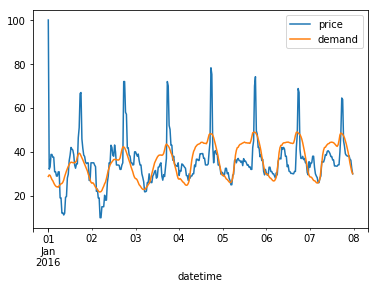

In [38]:
df_DAM_copy[['price', 'demand']].plot() # Note we use a list of the columns we want to slice the dataframe 
                                        # For a single column a list isn't required

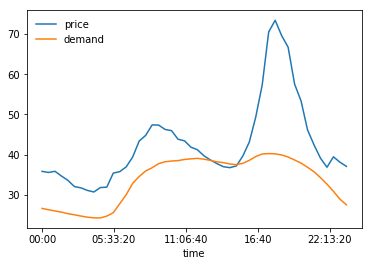

In [39]:
## Average Daily Profile for Price
s_avg_day_price = (df_DAM
                   .price                           # We select the column we want and create a series,
                   .groupby(df_DAM.index.time)      # group the series according to the time of day,
                   .mean()                          # and take the mean.
                  )

s_avg_day_price.plot()


## Average Daily Profile for Demand
s_avg_day_demand = (df_DAM
                    .demand
                    .groupby(df_DAM.index.time)
                    .mean()
                   )

s_avg_day_demand.plot()
plt.legend(frameon=False) # Setting the 'frameon' parameter to False removes the edge of the legend box

<br>

### Exploratory Data Analysis

Describe is a good way of quickly summarising key statistics about the data

In [33]:
df_DAM.describe()

,price,demand,biomass,coal,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped
count,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000,34895.000000
mean,42.578081,33.683599,1.631894,2.781574,14.059293,0.417363,7.544026,1.122363,4.285135,0.812030,1.001225,0.085002,-0.071782
std,24.975161,7.293205,0.500155,2.720193,4.988540,0.273719,0.639946,1.698925,2.567311,0.350688,1.159158,0.392185,0.879052
min,-1.430000,4.069000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266000,-1.035000,-2.049000,-0.991000,-2.524000
25%,32.640000,28.037000,1.371000,0.645000,10.197000,0.193000,7.125000,0.000000,2.130500,0.780000,0.476500,-0.183000,-0.697000
50%,39.250000,33.964000,1.883000,1.819000,14.010000,0.368000,7.629000,0.042000,3.875000,0.978000,1.490000,0.146000,0.304000
75%,47.900000,38.693500,2.057000,4.197500,17.803500,0.595000,7.993000,1.850000,5.968500,1.000000,1.974000,0.369000,0.432000
max,1000.000000,52.397000,2.595000,14.724000,26.566000,1.403000,8.859000,8.730000,12.443000,1.064000,2.065000,0.802000,2.394000


<br>

We can use df.corr() to get the correlation between each of the columns.

By default it uses pearsons correlation which looks at the linear relationship.

In [34]:
df_DAM.columns.values

array(['price', 'demand', 'biomass', 'coal', 'gas', 'hydro', 'nuclear ',
       'solar', 'wind', 'dutch', 'french', 'irish', 'pumped'],
      dtype=object)

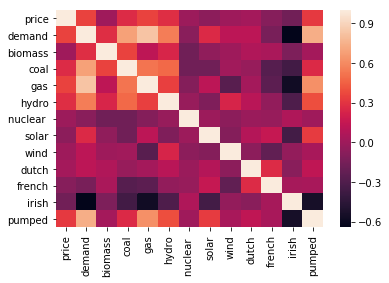

In [35]:
df_DAM_corr = df_DAM.corr()
df_DAM_cols = df_DAM.columns.values

sns.heatmap(df_DAM_corr, 
            xticklabels=df_DAM_cols,
            yticklabels=df_DAM_cols)

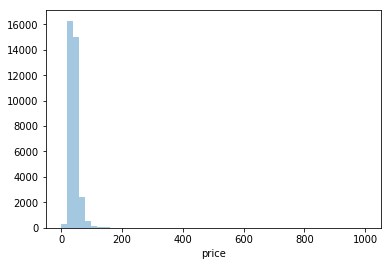

In [36]:
sns.distplot(df_DAM.price, kde=False)

<br>

We can use a frequency density plot to visualise the distribution of each column.

This is where we can use Seaborn higher-level plotting functions

<br>

One issue with a few of the columns is that there are some extreme outliers.

We can use Pandas inbuilt functions to determine the standard deviation and then define a cut-off point for each series.

Here we remove all values which are more than 3 standard deviations above the mean

In [40]:
three_std_dev_upper_lim = int(df_DAM['price'].mean() + df_DAM['price'].std()*3) 
three_std_dev_upper_lim

117

In [41]:
df_DAM['demand'].std()*3

21.879613593570006

Text(0,0.5,'Frequency Distribution')

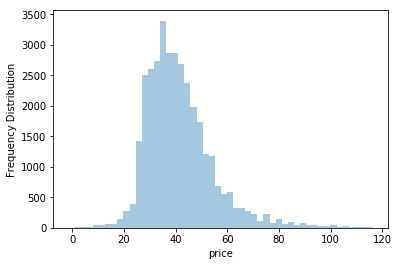

In [44]:
s_bool_outliers = df_DAM['price']<three_std_dev_upper_lim

plt.figure()
sns.distplot(df_DAM[s_bool_outliers]['price'], kde=False)
plt.ylabel('Frequency Distribution')

<br>

We will now make use of a for loop to iterate over the columns, trimming and plotting each of them.

In [45]:
columns = df_DAM.columns

for column in columns:
    print(column)

price
demand
biomass
coal
gas
hydro
nuclear 
solar
wind
dutch
french
irish
pumped


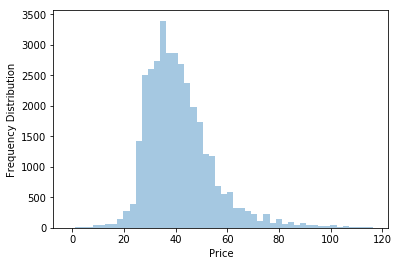

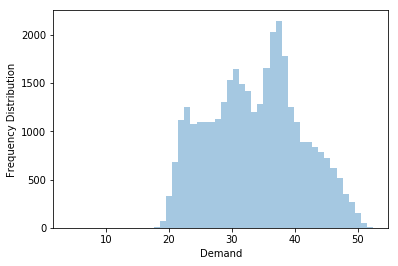

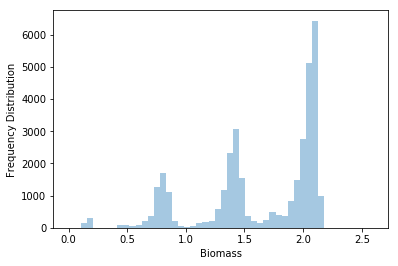

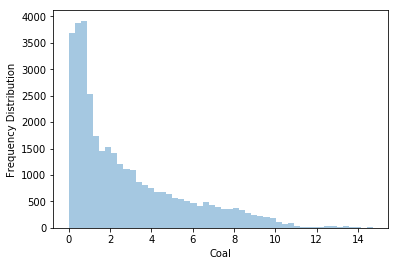

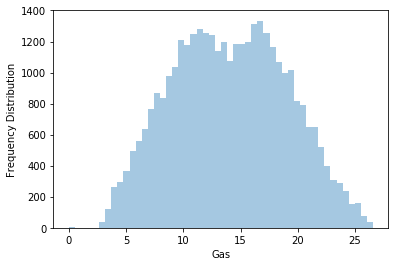

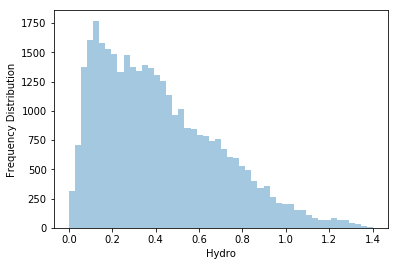

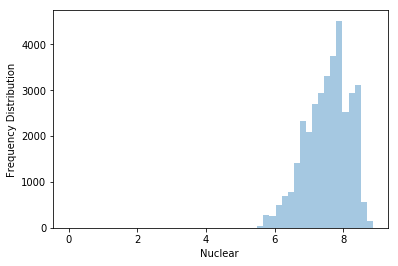

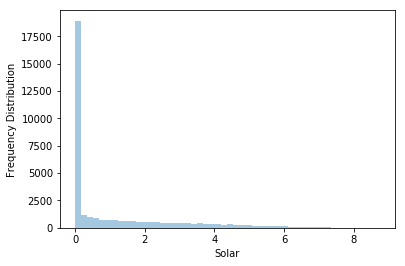

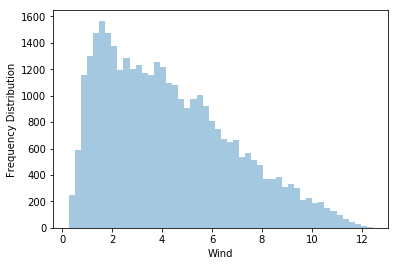

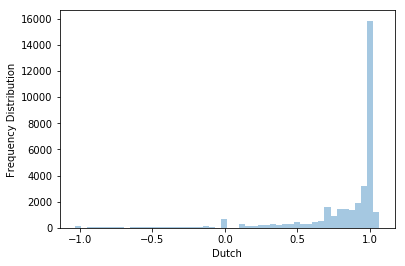

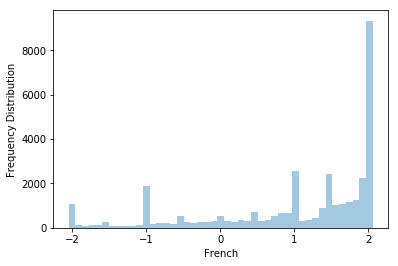

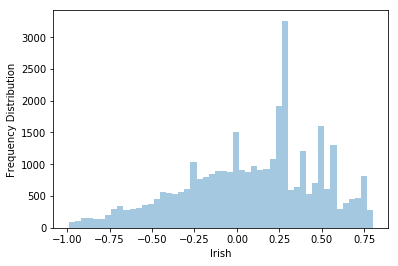

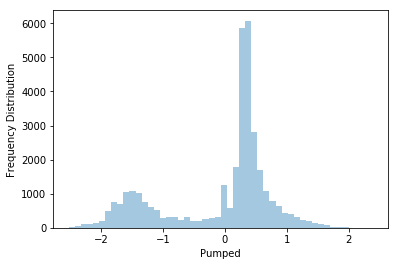

In [46]:
columns = df_DAM.columns

for column in columns:
    s_bool_outliers = df_DAM[column]<three_std_dev_upper_lim
    
    plt.figure()
    sns.distplot(df_DAM[s_bool_outliers][column], kde=False)
    plt.ylabel('Frequency Distribution')
    plt.xlabel(column.capitalize())

<br>

### More Advanced Plotting

One of the key relationships is between demand and price, we can use matplotlib's plt.scatter(x, y) to visualise it.

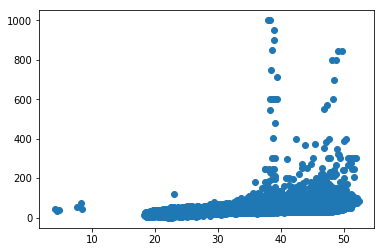

In [47]:
plt.scatter(df_DAM['demand'], df_DAM['price'])

<br>

There's definitely some improvement we can make to this plot. 

First we'll label and define some limits for the x and y axis, as well as making the size of each data point smaller

(15, 55)

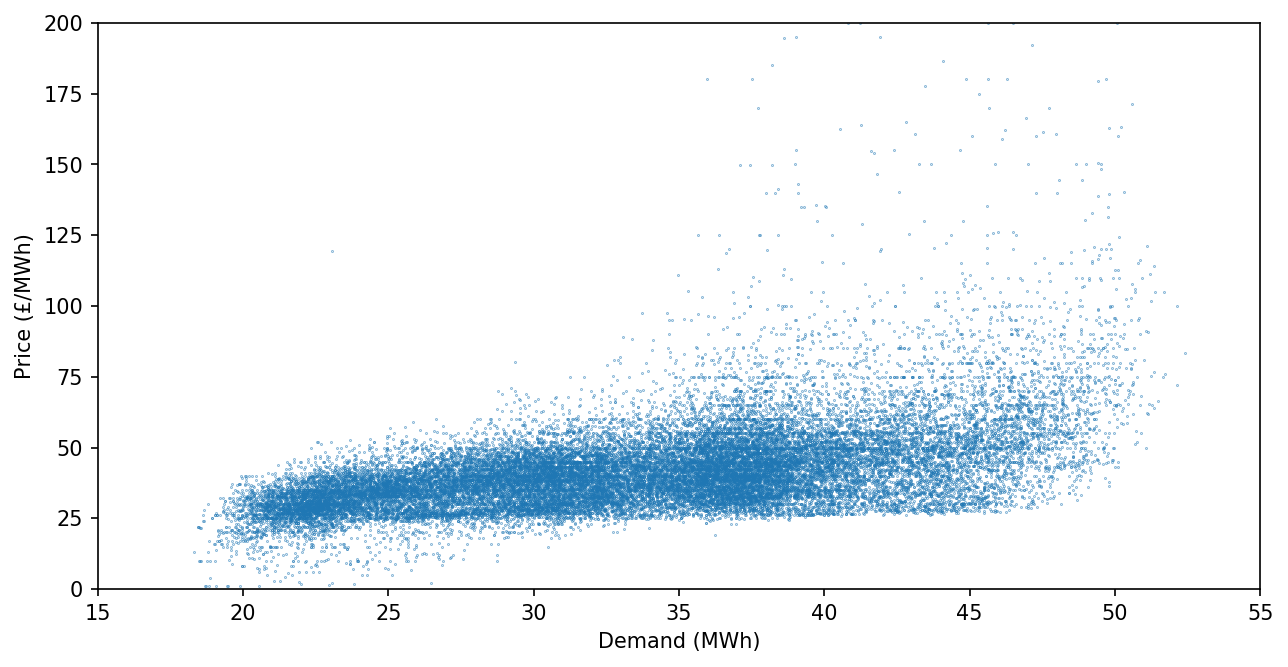

In [48]:
plt.figure(dpi=150, figsize=(10, 5)) # dpi refers to the number of pixels (dpi=1080 is equivalent to a TV's 1080)
                                     # figsize takes a tuple containing the x and y axis lengths respectively

plt.scatter(df_DAM['demand'], df_DAM['price'], s=0.05) # 's' sets the size of each marker

plt.ylabel('Price (£/MWh)')
plt.xlabel('Demand (MWh)')

plt.ylim(0, 200)
plt.xlim(15, 55)

<br>

Most exploratory data analysis looks at only 1 or 2 of the variables in a single plot.

To bring in a third we can either plot in 3D or use something else to represent the extra dimension, in this example we'll use colour.

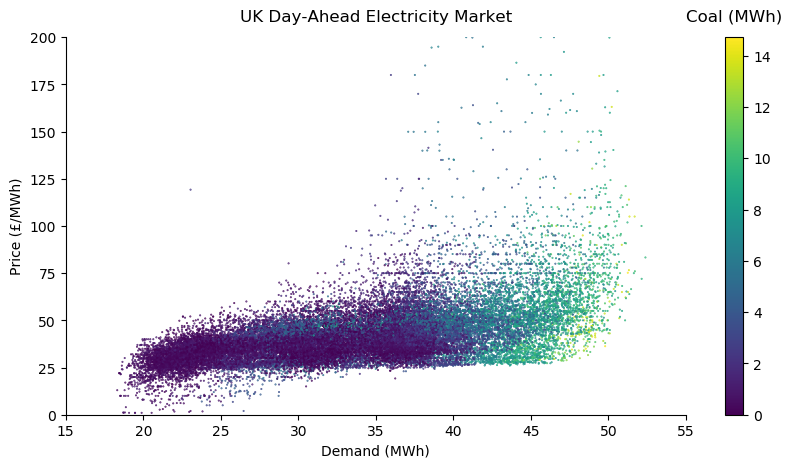

In [49]:
## Plotting Function
def fancy_plotter(x, y, c, clb_title=''):
    fig = plt.figure(figsize=(10, 5), dpi=100) # Matplotlib uses a figure
    ax = plt.subplot()                         # which we then create an axis on

    plt.scatter(x, y, c=c, s=0.2)
    clb = plt.colorbar()                       # If the plotting function is given a color series we can add a colour bar
    
    clb.ax.set_title(clb_title, y=1.02)

    plt.ylabel('Price (£/MWh)')
    plt.xlabel('Demand (MWh)')
    plt.title('UK Day-Ahead Electricity Market', y=1.02)

    plt.ylim(0, 200)
    plt.xlim(15, 55)

    ax.spines['right'].set_visible(False)      # To clean up the plot we'll remove the top and right axis spines
    ax.spines['top'].set_visible(False)
    
    return fig, ax
  

x = df_DAM['demand']
y = df_DAM['price']
c = df_DAM['coal']

fig, ax = fancy_plotter(x, y, c, clb_title='Coal (MWh)')

<br>

Again we'll iterate over a number of the columns and plot them individually.

We'll also use an f-string (formatted string) which lets us makes strings using defined values

In [50]:
df_DAM.columns

Index(['price', 'demand', 'biomass', 'coal', 'gas', 'hydro', 'nuclear ',
       'solar', 'wind', 'dutch', 'french', 'irish', 'pumped'],
      dtype='object')

In [51]:
value = 12
f'Coal {value}'

'Coal 12'

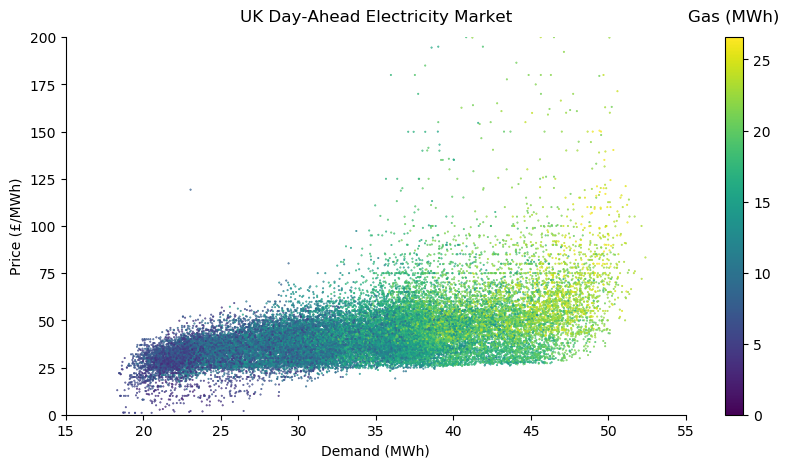

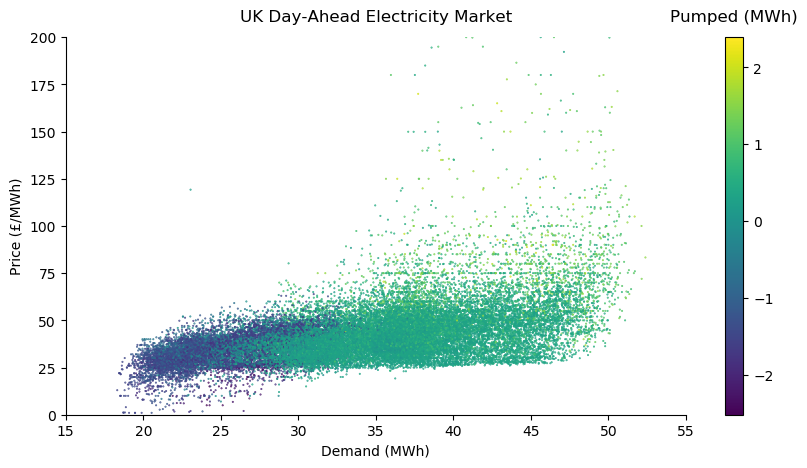

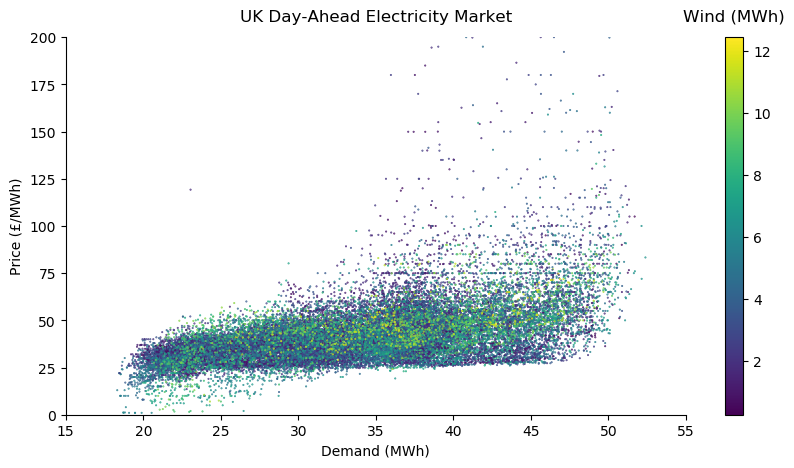

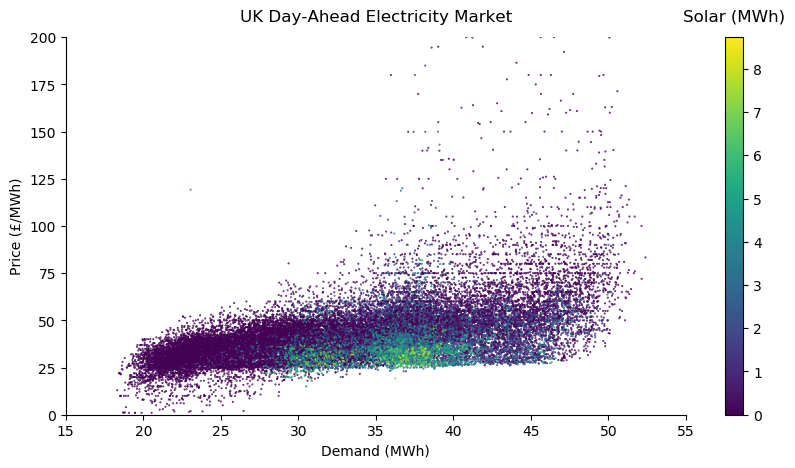

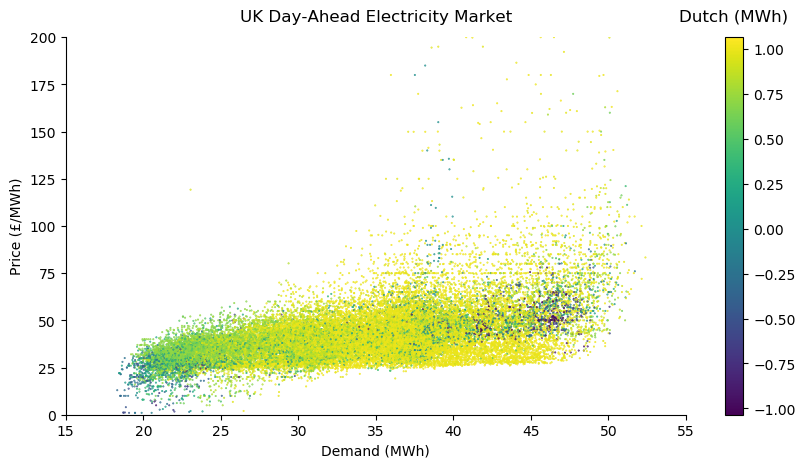

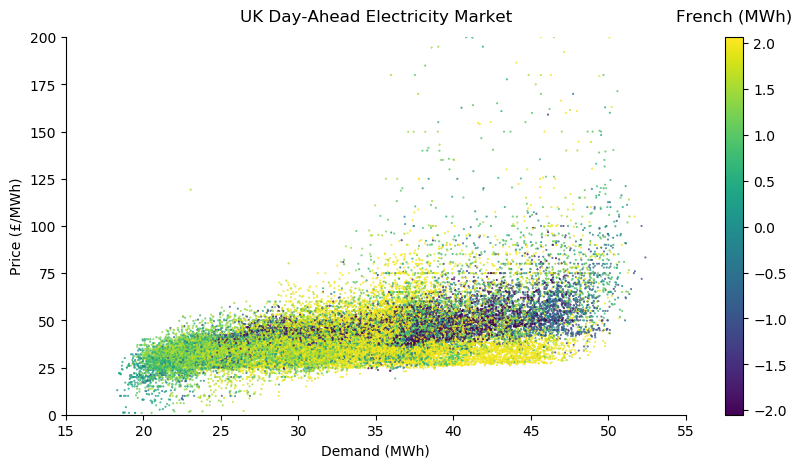

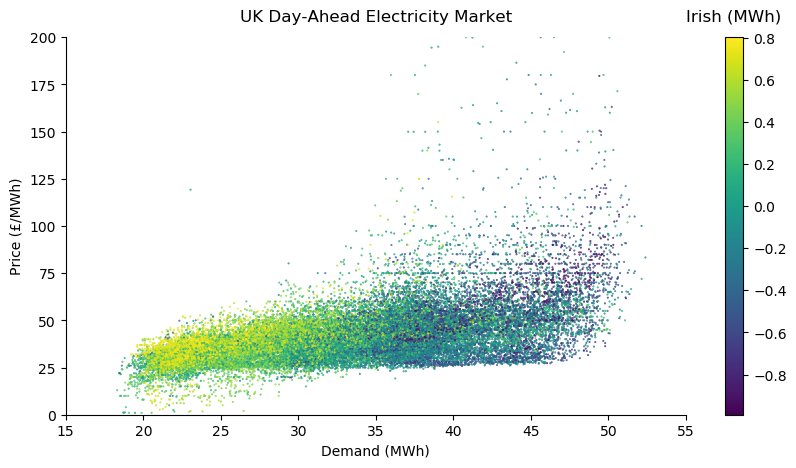

In [52]:
columns = ['gas', 'pumped', 'wind', 'solar', 'dutch', 'french', 'irish']

for column in columns:
    cap_col_name = column.capitalize()
    clb_title = f'{cap_col_name} (MWh)'
    
    fancy_plotter(x, y, df_DAM[column], clb_title=clb_title)

<br>

As intermittent fuel sources often have very low operating costs (eg. solar and wind) they shift the price away from the 'normal' demand curve.

We can see this 'Merit Order Effect' by plotting the demand met by dispatchable resources on the x axis (shown in bottom plot)

(10, 50)

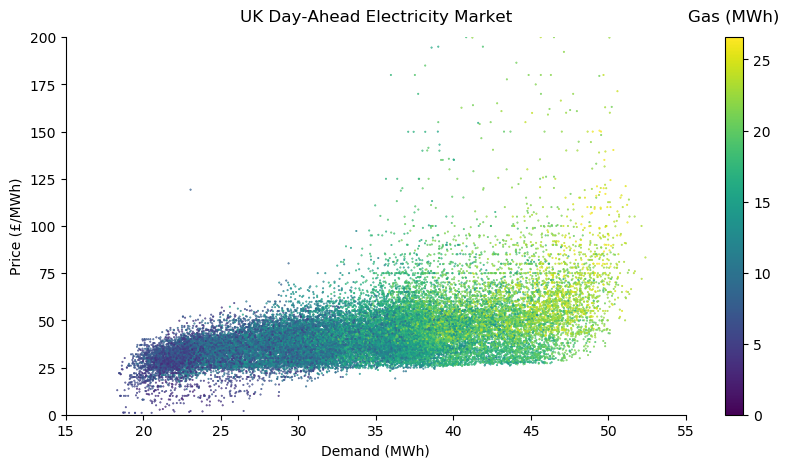

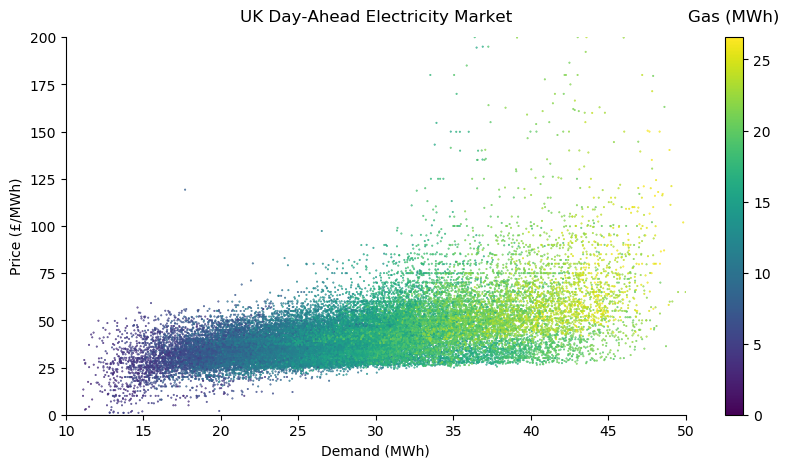

In [54]:
x = df_DAM['demand']
x_modified = df_DAM['demand'] - ( df_DAM['solar'] + df_DAM['wind'] )
y = df_DAM['price']
c = df_DAM['gas']

fancy_plotter(x, y, c, clb_title='Gas (MWh)')
fancy_plotter(x_modified, y, c, clb_title='Gas (MWh)')
plt.xlim(10, 50)